<h1>Análise Exploratória dos Dados - Base de Dados para Scoring</h1>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from funcoes_uteis import FuncoesUteis

<h3>>> Carregamento dos dados</h3>

In [2]:
amostra = pd.read_csv('storage/raw/sample.csv', sep=',')

amostra.columns

Index(['Target', 'Id_cliente', 'leads_dt_evento_max', 'leads_dt_evento_min',
       'leads_tempo_desde_evento_anterior_mean',
       'leads_tempo_desde_evento_anterior_std',
       'leads_tempo_desde_evento_anterior_min',
       'leads_tempo_desde_evento_anterior_25',
       'leads_tempo_desde_evento_anterior_50',
       'leads_tempo_desde_evento_anterior_75',
       ...
       'tempo_min_lead_ate_hj', 'tempo_min_visita_ate_hj',
       'tempo_max_lead_ate_hj', 'tempo_max_visita_ate_hj',
       'tempo_desde_ult_fechamento', 'chatbot_qtd_conversas',
       'chatbot_qtd_conversas_finalizadas',
       'chatbot_tempo_medio_segundos_de_conversas', 'mes_inicio_lead',
       'mes_ref'],
      dtype='object', length=234)

<h3>>> Seleção o dado que será analisado</h3>

In [3]:
amostra = amostra[amostra['Target'] == 0]

amostra['Target'].value_counts()

Target
0    5000
Name: count, dtype: int64

<ul>
    <li> Perguntas sobre a base:
        <ul>
            <li>(1.) Quantos registros tem na base?</li>
            <li>(2.) Quantas variáveis tem na base?</li>
            <li>(3.) Qual a composição de tipos de variáveis (int, object ou floar)?</li>
            <li>(4.) Como está a saúde da base? (Nulos, Zeros, Valores Discrepantes, etc)</li>
            <li>(5.) Como está a presença de outliers nas variáveis?</li>
        </ul>
    </li>
</ul>

<h3>1. Quantidade de registros e colunas na Base</h3>

In [4]:
print("A base apresenta {} registros e {} colunas.".format(amostra.shape[0], amostra.shape[1])) 

A base apresenta 5000 registros e 234 colunas.


<h3>2. Contagem dos tipos de variáveis</h3>

In [5]:
sumario, col_int, col_object, col_float = FuncoesUteis.contagem_tipos_variaveis(amostra)

sumario

,Tipo,Quantidade
0,Int,4
1,Float,223
2,Object,7
3,Total Colunas,234


<h3>3. Visualizando os valores ausentes e nulos</h3>

In [6]:
sumario_nulos = FuncoesUteis.varredura_nulos(amostra)
sn = sumario_nulos.reset_index().rename(columns={'index':'variaveis'})

sn[sn['contagem_nas']>30]

,variaveis,total_elementos,unicos,contagem_nulos,percentual_nulos,contagem_nas,percentual_nas
0,tempo_min_visita_ate_fechamento,5000,55,4939,98.78,4939,98.78
1,tempo_max_visita_ate_fechamento,5000,52,4939,98.78,4939,98.78
2,tempo_min_ate_fechamento,5000,127,4851,97.02,4851,97.02
3,tempo_min_lead_ate_fechamento,5000,134,4851,97.02,4851,97.02
4,fechamentos_opercao_venda,5000,6,4851,97.02,4851,97.02
...,...,...,...,...,...,...,...
162,leads_in_dorm_50,5000,10,213,4.26,213,4.26
163,leads_in_dorm_25,5000,10,213,4.26,213,4.26
164,leads_in_dorm_min,5000,10,213,4.26,213,4.26
165,leads_in_dorm_mean,5000,209,213,4.26,213,4.26


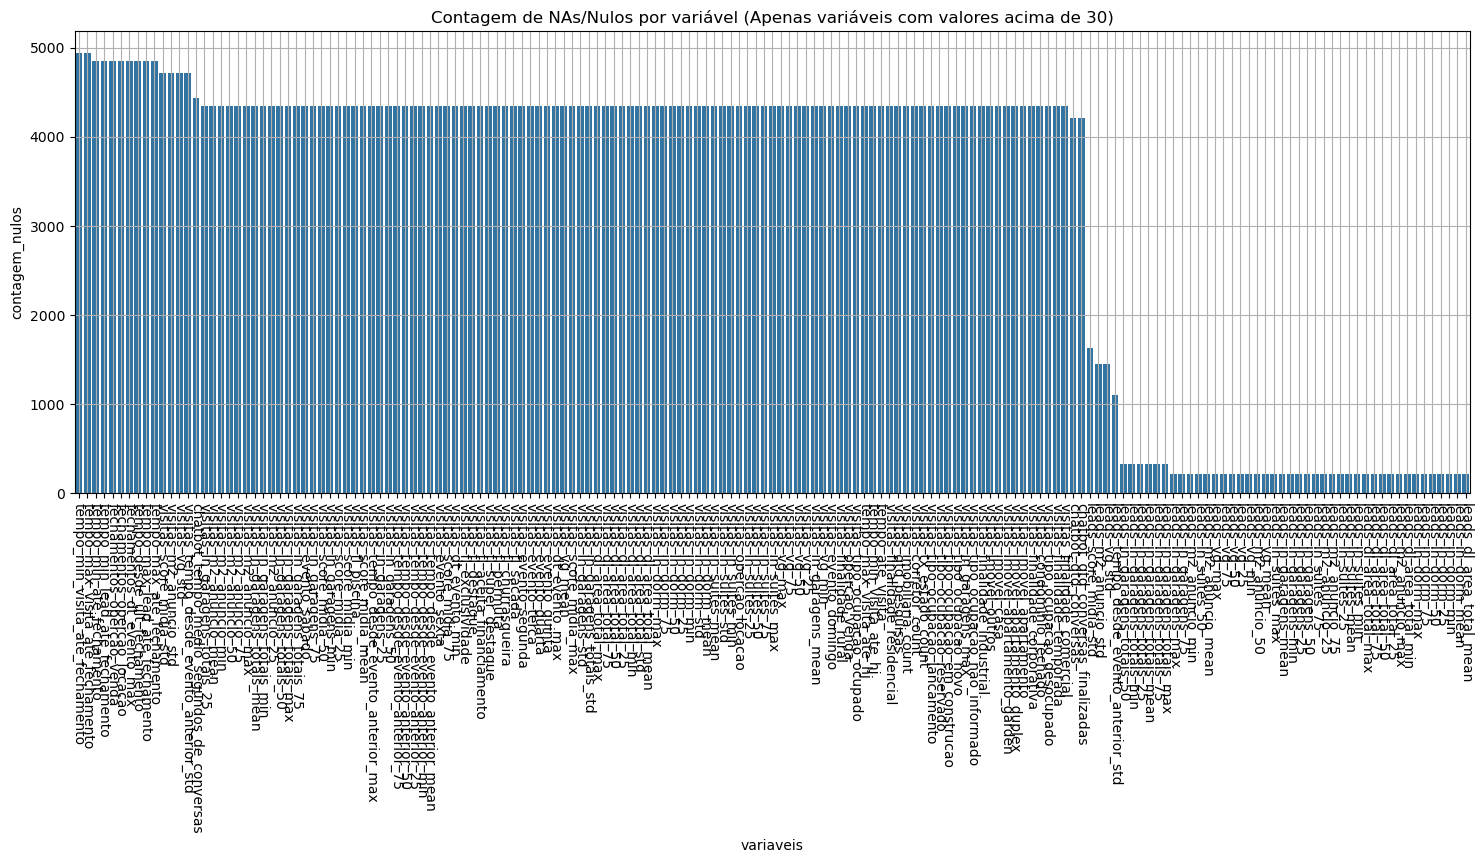

In [7]:
plt.figure(figsize=(18,6))
sns.barplot(data=sn[sn['contagem_nas']>30], x ='variaveis' , y ='contagem_nulos')
plt.title('Contagem de NAs/Nulos por variável (Apenas variáveis com valores acima de 30)')
plt.grid(True)
plt.xticks(rotation=270)
plt.show()

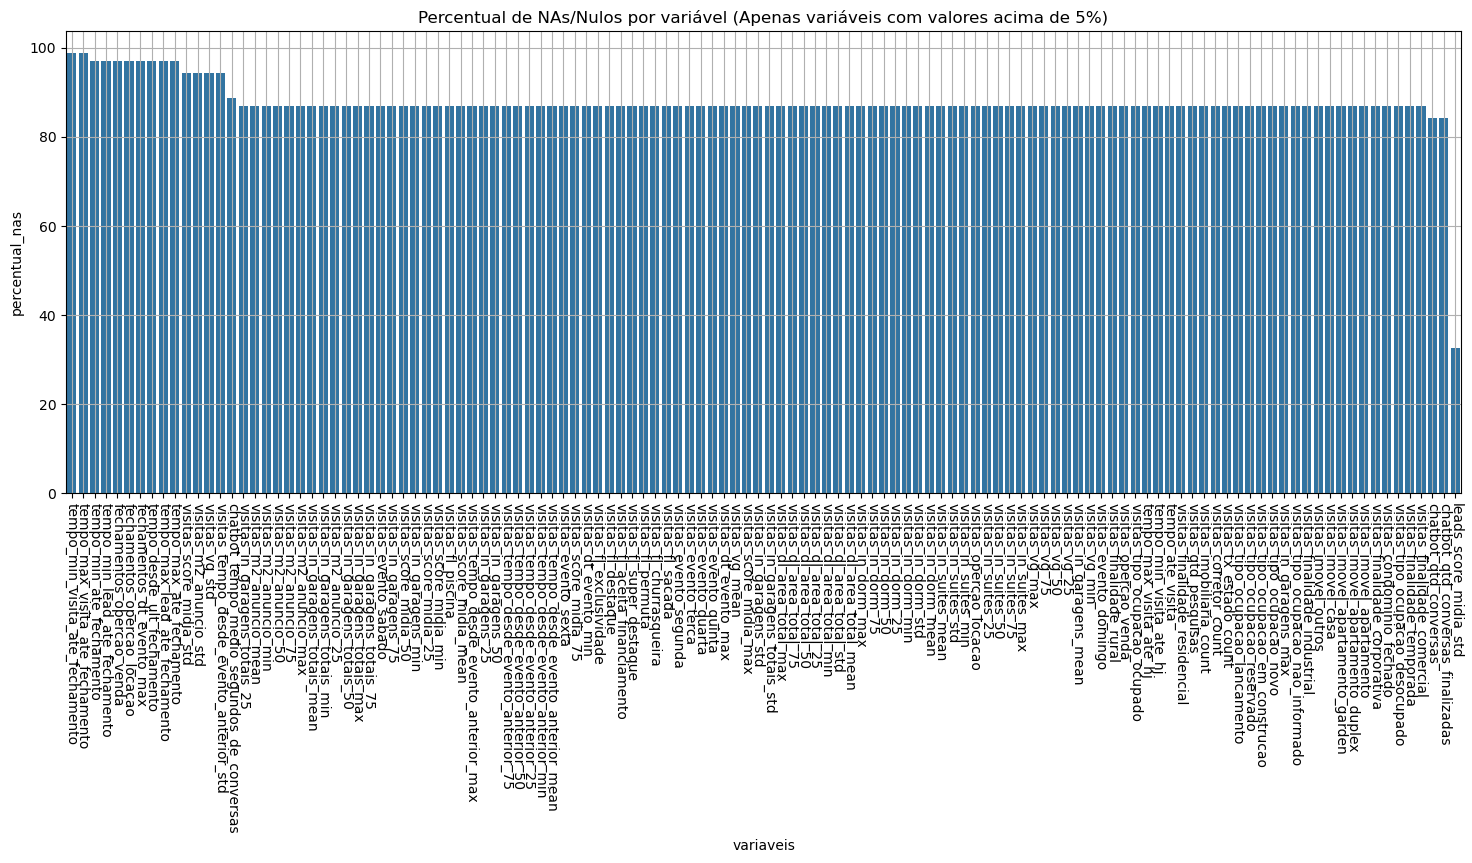

In [8]:
plt.figure(figsize=(18,6))
sns.barplot(data=sn[sn['percentual_nas']>30], x ='variaveis' , y ='percentual_nas')
plt.title('Percentual de NAs/Nulos por variável (Apenas variáveis com valores acima de 5%)')
plt.grid(True)
plt.xticks(rotation=270)
plt.show()

<h3>3.1 Inspeção dos nulos por tipo de variável</h3>

<h3>3.1.1 Colunas do Tipo Object</h3>

In [9]:
sn[sn['variaveis'].isin(col_object)]

,variaveis,total_elementos,unicos,contagem_nulos,percentual_nulos,contagem_nas,percentual_nas
6,fechamentos_dt_evento_max,5000,129,4851,97.02,4851,97.02
45,visitas_dt_evento_min,5000,399,4346,86.92,4346,86.92
57,visitas_dt_evento_max,5000,350,4346,86.92,4346,86.92
171,mes_inicio_lead,5000,161,0,0.00,0,0.00
200,leads_dt_evento_min,5000,4978,0,0.00,0,0.00
201,leads_dt_evento_max,5000,4906,0,0.00,0,0.00
233,mes_ref,5000,1,0,0.00,0,0.00


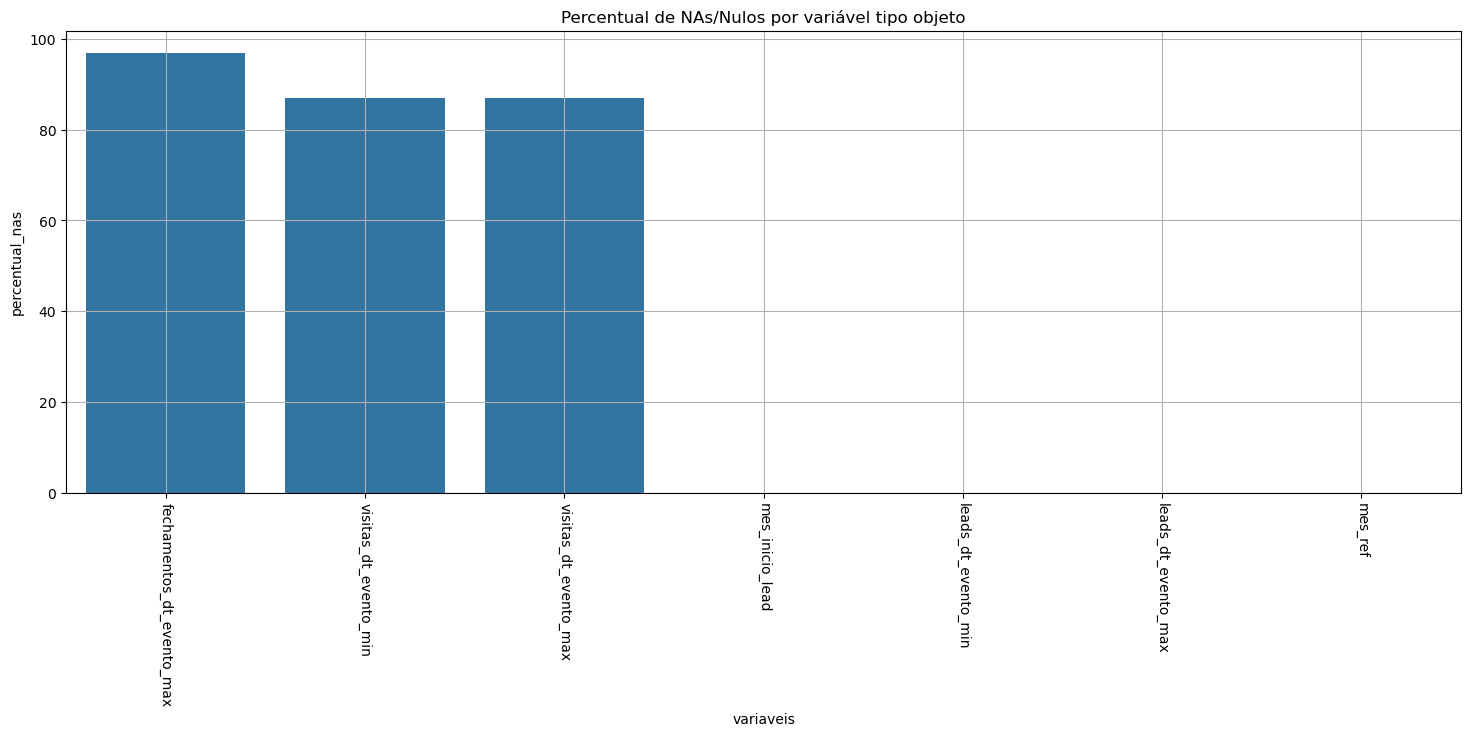

In [10]:
plt.figure(figsize=(18,6))
sns.barplot(data=sn[sn['variaveis'].isin(col_object)], x ='variaveis' , y ='percentual_nas')
plt.title('Percentual de NAs/Nulos por variável tipo objeto')
plt.grid(True)
plt.xticks(rotation=270)
plt.show()

In [11]:
amostra[col_object]

,leads_dt_evento_max,leads_dt_evento_min,visitas_dt_evento_min,visitas_dt_evento_max,fechamentos_dt_evento_max,mes_inicio_lead,mes_ref
0,2024-04-12 11:00:24,2019-07-11 10:39:29.713000,NaN,NaN,NaN,2019-07-01 00:00:00,2024-04-01
1,2024-04-12 10:59:52,2019-10-30 16:21:58.937000,NaN,NaN,NaN,2019-10-01 00:00:00,2024-04-01
2,2024-04-12 10:59:37,2024-02-26 15:48:00.013000,NaN,NaN,NaN,2024-02-01 00:00:00,2024-04-01
3,2024-04-12 10:59:30,2019-07-23 16:45:53.387000,NaN,NaN,NaN,2019-07-01 00:00:00,2024-04-01
4,2024-04-12 10:59:18,2024-04-10 09:51:54.990000,NaN,NaN,NaN,2024-04-01 00:00:00,2024-04-01
...,...,...,...,...,...,...,...
4995,2024-04-11 18:47:06.967,2023-07-10 08:32:59.257000,NaN,NaN,NaN,2023-07-01 00:00:00,2024-04-01
4996,2024-04-11 18:47:01.000,2019-05-16 17:05:24.250000,2021-06-17,2021-06-17,NaN,2019-05-01 00:00:00,2024-04-01
4997,2024-04-11 18:46:59.207,2023-03-04 13:04:48.500000,2023-05-27,2024-04-12,NaN,2023-03-01 00:00:00,2024-04-01
4998,2024-04-11 18:46:55.980,2024-03-04 20:12:51,NaN,NaN,NaN,2024-03-01 00:00:00,2024-04-01


<div style="text-align:justify">
<b>Comentário:</b><br>
As colunas : 'leads_dt_evento_max', 'leads_dt_evento_min', 'visitas_dt_evento_min', 'visitas_dt_evento_max', 'fechamentos_dt_evento_max', 'mes_inicio_lead', 'mes_ref' serão removidos por apresentarem valores unicos e por apresentarem datas que no primeiro momento parecem não ter muito valor informativo. Se houver tempo vou observar elas mais a frente. 
</div>

<h3>3.1.2 Colunas do Tipo Int</h3>

In [12]:
sn[sn['variaveis'].isin(col_int)]

,variaveis,total_elementos,unicos,contagem_nulos,percentual_nulos,contagem_nas,percentual_nas
167,tempo_max_ate_hj,5000,1825,0,0.0,0,0.0
170,tempo_min_ate_hj,5000,6,0,0.0,0,0.0
172,Target,5000,1,0,0.0,0,0.0
173,Id_cliente,5000,5000,0,0.0,0,0.0


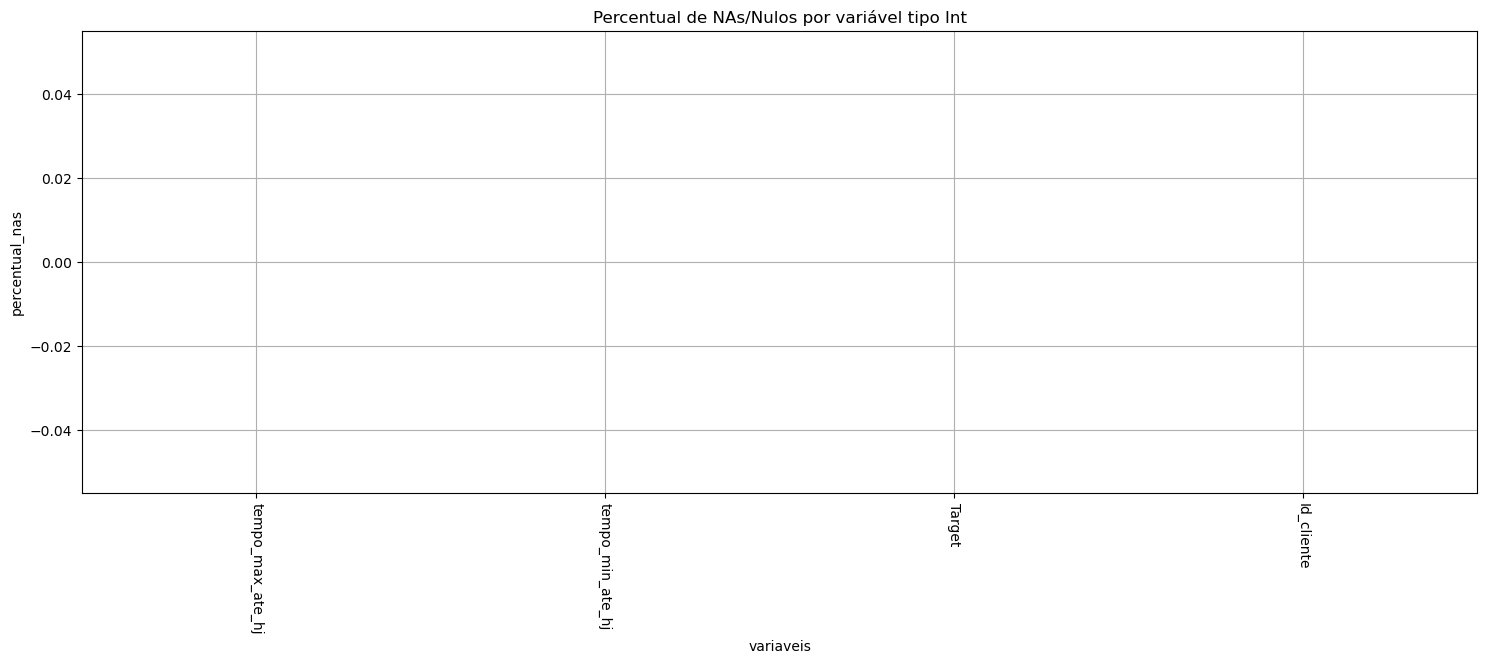

In [13]:
plt.figure(figsize=(18,6))
sns.barplot(data=sn[sn['variaveis'].isin(col_int)], x ='variaveis' , y ='percentual_nas')
plt.title('Percentual de NAs/Nulos por variável tipo Int')
plt.grid(True)
plt.xticks(rotation=270)
plt.show()

In [14]:
amostra[col_int]

,Target,Id_cliente,tempo_max_ate_hj,tempo_min_ate_hj
0,0,1,1754,17
1,0,2,1643,17
2,0,3,63,17
3,0,4,1742,17
4,0,5,19,17
...,...,...,...,...
4995,0,4996,294,18
4996,0,4997,1810,18
4997,0,4998,422,18
4998,0,4999,56,18


In [15]:
amostra['tempo_max_ate_hj'].describe()

count     5000.00000
mean       998.32720
std       4154.42684
min         17.00000
25%         19.00000
50%        374.50000
75%       1342.00000
max      99100.00000
Name: tempo_max_ate_hj, dtype: float64

In [16]:
amostra['tempo_min_ate_hj'].describe()

count    5000.000000
mean       17.687800
std         0.500781
min         7.000000
25%        17.000000
50%        18.000000
75%        18.000000
max        18.000000
Name: tempo_min_ate_hj, dtype: float64

<h3>3.1.3 Colunas do Tipo float</h3>

In [17]:
sn[sn['variaveis'].isin(col_float)]

,variaveis,total_elementos,unicos,contagem_nulos,percentual_nulos,contagem_nas,percentual_nas
0,tempo_min_visita_ate_fechamento,5000,55,4939,98.78,4939,98.78
1,tempo_max_visita_ate_fechamento,5000,52,4939,98.78,4939,98.78
2,tempo_min_ate_fechamento,5000,127,4851,97.02,4851,97.02
3,tempo_min_lead_ate_fechamento,5000,134,4851,97.02,4851,97.02
4,fechamentos_opercao_venda,5000,6,4851,97.02,4851,97.02
...,...,...,...,...,...,...,...
228,leads_opercao_locacao,5000,61,0,0.00,0,0.00
229,leads_evento_domingo,5000,29,0,0.00,0,0.00
230,leads_evento_sabado,5000,32,0,0.00,0,0.00
231,leads_evento_sexta,5000,34,0,0.00,0,0.00


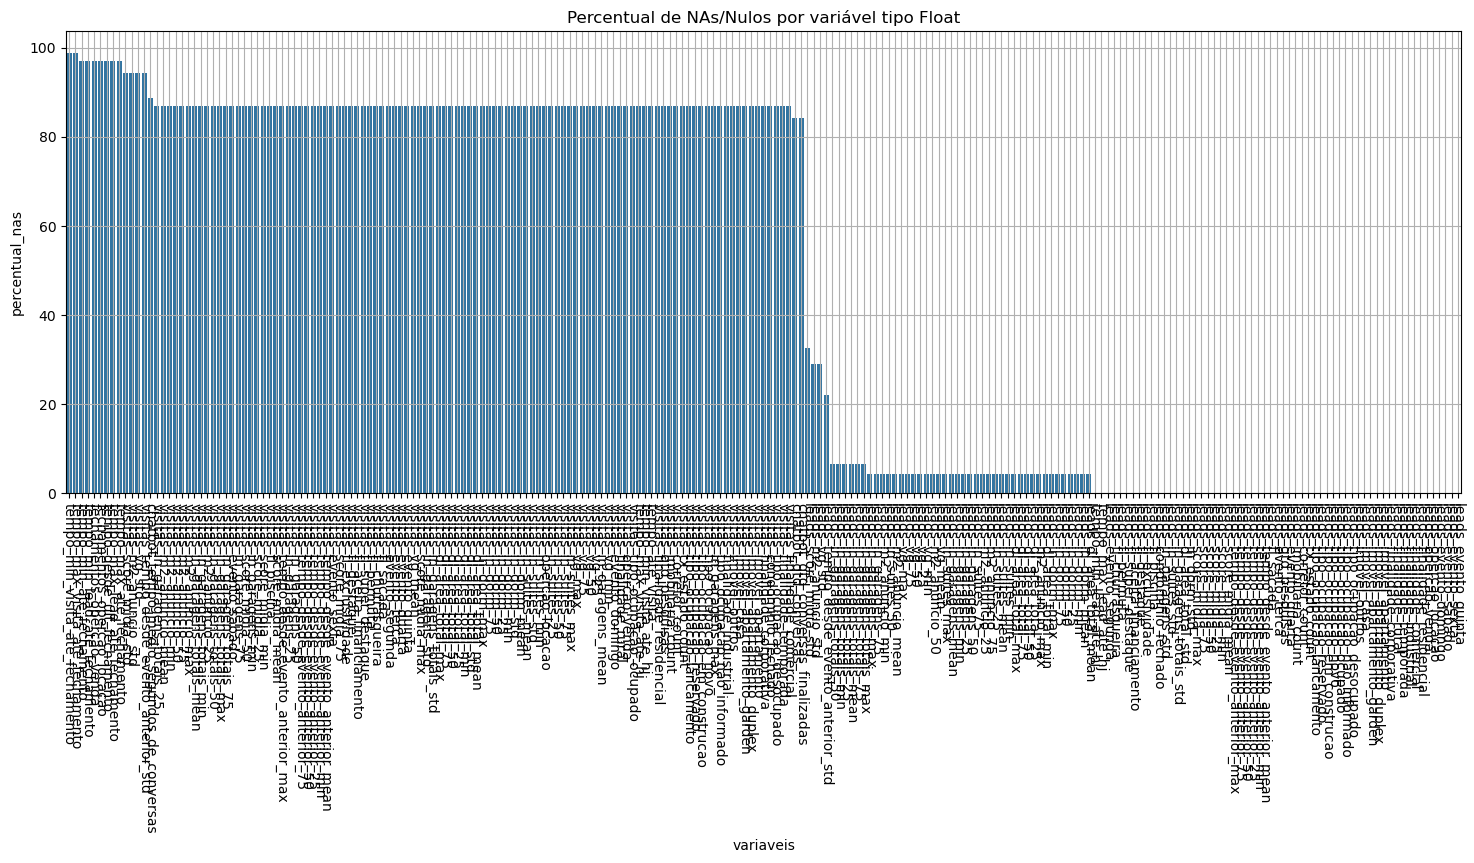

In [18]:
plt.figure(figsize=(18,6))
sns.barplot(data=sn[sn['variaveis'].isin(col_float)], x ='variaveis' , y ='percentual_nas')
plt.title('Percentual de NAs/Nulos por variável tipo Float')
plt.grid(True)
plt.xticks(rotation=270)
plt.show()

<h5>Visualizando percentual de nulos menores ou igual a 40%</h5>

In [19]:
sn[sn['percentual_nas'] <= 40]

,variaveis,total_elementos,unicos,contagem_nulos,percentual_nulos,contagem_nas,percentual_nas
121,leads_score_midia_std,5000,1914,1624,32.48,1624,32.48
122,leads_m2_anuncio_std,5000,3042,1453,29.06,1453,29.06
123,leads_vg_std,5000,3006,1452,29.04,1452,29.04
124,leads_tempo_desde_evento_anterior_std,5000,3315,1099,21.98,1099,21.98
125,leads_in_garagens_totais_50,5000,20,331,6.62,331,6.62
...,...,...,...,...,...,...,...
229,leads_evento_domingo,5000,29,0,0.00,0,0.00
230,leads_evento_sabado,5000,32,0,0.00,0,0.00
231,leads_evento_sexta,5000,34,0,0.00,0,0.00
232,leads_evento_quinta,5000,39,0,0.00,0,0.00


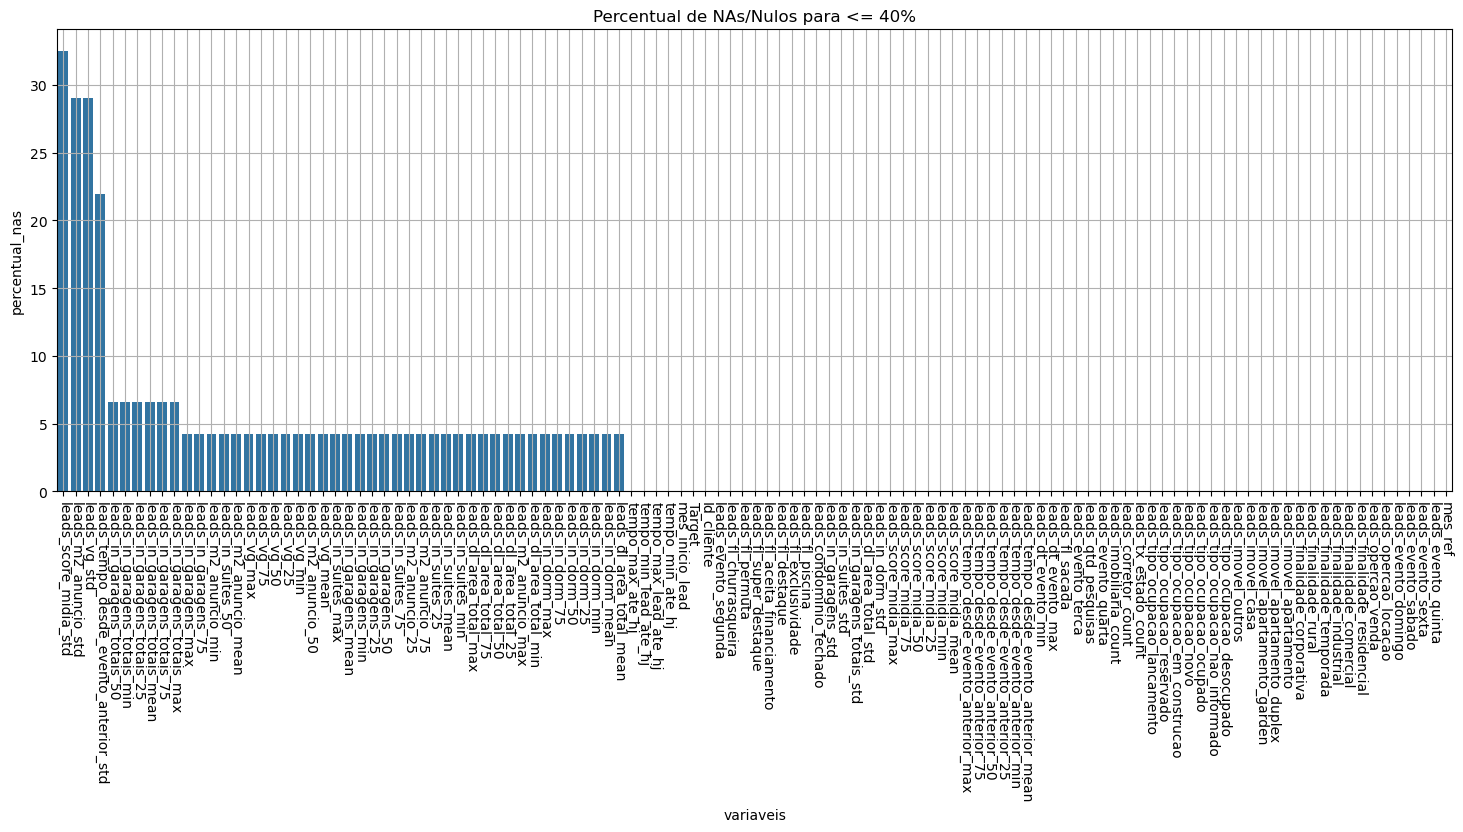

In [20]:
plt.figure(figsize=(18,6))
sns.barplot(data=sn[sn['percentual_nas'] <= 40], x ='variaveis' , y ='percentual_nas')
plt.title('Percentual de NAs/Nulos para <= 40%')
plt.grid(True)
plt.xticks(rotation=270)
plt.show()

<div style="text-align:justify">
<b>Comentário:</b><br>
Existem um número bem grande variáveis que apresentaram nulos acima de 40%
</div>

In [21]:
dados_nulos_removidos = FuncoesUteis.remocao_variaveis_nulos(data=amostra, valor_corte=0.4)

dados_nulos_removidos

,Target,Id_cliente,leads_dt_evento_max,leads_dt_evento_min,leads_tempo_desde_evento_anterior_mean,leads_tempo_desde_evento_anterior_std,leads_tempo_desde_evento_anterior_min,leads_tempo_desde_evento_anterior_25,leads_tempo_desde_evento_anterior_50,leads_tempo_desde_evento_anterior_75,...,leads_tx_estado_count,leads_corretor_count,leads_imobiliaria_count,leads_qtd_pesquisas,tempo_max_ate_hj,tempo_min_ate_hj,tempo_min_lead_ate_hj,tempo_max_lead_ate_hj,mes_inicio_lead,mes_ref
0,0,1,2024-04-12 11:00:24,2019-07-11 10:39:29.713000,72.04,157.91,0.0,0.0,2.0,79.0,...,1.0,1.0,9.0,24.0,1754,17,1754.0,17.0,2019-07-01 00:00:00,2024-04-01
1,0,2,2024-04-12 10:59:52,2019-10-30 16:21:58.937000,147.45,462.86,0.0,0.0,0.0,17.0,...,1.0,1.0,8.0,11.0,1643,17,1643.0,17.0,2019-10-01 00:00:00,2024-04-01
2,0,3,2024-04-12 10:59:37,2024-02-26 15:48:00.013000,8.60,9.71,0.0,0.0,7.0,13.0,...,1.0,1.0,4.0,5.0,63,17,63.0,17.0,2024-02-01 00:00:00,2024-04-01
3,0,4,2024-04-12 10:59:30,2019-07-23 16:45:53.387000,172.20,295.97,0.0,0.0,34.0,273.0,...,1.0,1.0,5.0,10.0,1742,17,1742.0,17.0,2019-07-01 00:00:00,2024-04-01
4,0,5,2024-04-12 10:59:18,2024-04-10 09:51:54.990000,0.67,1.15,0.0,0.0,0.0,2.0,...,1.0,1.0,1.0,3.0,19,17,19.0,17.0,2024-04-01 00:00:00,2024-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,4996,2024-04-11 18:47:06.967,2023-07-10 08:32:59.257000,24.73,51.22,0.0,0.0,0.0,14.0,...,1.0,1.0,4.0,11.0,294,18,294.0,18.0,2023-07-01 00:00:00,2024-04-01
4996,0,4997,2024-04-11 18:47:01.000,2019-05-16 17:05:24.250000,137.62,235.68,0.0,0.0,3.0,143.0,...,2.0,1.0,6.0,13.0,1810,18,1810.0,18.0,2019-05-01 00:00:00,2024-04-01
4997,0,4998,2024-04-11 18:46:59.207,2023-03-04 13:04:48.500000,134.33,178.59,0.0,0.0,66.0,337.0,...,1.0,1.0,3.0,3.0,422,18,422.0,18.0,2023-03-01 00:00:00,2024-04-01
4998,0,4999,2024-04-11 18:46:55.980,2024-03-04 20:12:51,2.19,4.42,0.0,0.0,0.0,3.0,...,1.0,1.0,10.0,16.0,56,18,56.0,18.0,2024-03-01 00:00:00,2024-04-01


<div style="text-align:justify">
<b>Comentário:</b><br>
Uma solução foi remover as colunas com valores acima de 40% de nulos
</div>

In [22]:
FuncoesUteis.varredura_nulos(dados_nulos_removidos)

,total_elementos,unicos,contagem_nulos,percentual_nulos,contagem_nas,percentual_nas
leads_score_midia_std,5000,1914,1624,32.48,1624,32.48
leads_m2_anuncio_std,5000,3042,1453,29.06,1453,29.06
leads_vg_std,5000,3006,1452,29.04,1452,29.04
leads_tempo_desde_evento_anterior_std,5000,3315,1099,21.98,1099,21.98
leads_in_garagens_totais_75,5000,22,331,6.62,331,6.62
...,...,...,...,...,...,...
leads_fl_permuta,5000,31,0,0.00,0,0.00
leads_fl_churrasqueira,5000,3,0,0.00,0,0.00
leads_fl_sacada,5000,4,0,0.00,0,0.00
leads_evento_segunda,5000,45,0,0.00,0,0.00


In [23]:
print('O total de variáveis restantes com até 40% de nulos foi de {} variáveis'.format(dados_nulos_removidos.shape[1]))

O total de variáveis restantes com até 40% de nulos foi de 113 variáveis


<h3>Remoção das váriaveis do tipo object</h3>

In [24]:
dados_nulos_removidos.columns

Index(['Target', 'Id_cliente', 'leads_dt_evento_max', 'leads_dt_evento_min',
       'leads_tempo_desde_evento_anterior_mean',
       'leads_tempo_desde_evento_anterior_std',
       'leads_tempo_desde_evento_anterior_min',
       'leads_tempo_desde_evento_anterior_25',
       'leads_tempo_desde_evento_anterior_50',
       'leads_tempo_desde_evento_anterior_75',
       ...
       'leads_tx_estado_count', 'leads_corretor_count',
       'leads_imobiliaria_count', 'leads_qtd_pesquisas', 'tempo_max_ate_hj',
       'tempo_min_ate_hj', 'tempo_min_lead_ate_hj', 'tempo_max_lead_ate_hj',
       'mes_inicio_lead', 'mes_ref'],
      dtype='object', length=113)

In [25]:
col_object

['leads_dt_evento_max',
 'leads_dt_evento_min',
 'visitas_dt_evento_min',
 'visitas_dt_evento_max',
 'fechamentos_dt_evento_max',
 'mes_inicio_lead',
 'mes_ref']

In [26]:
dados_nulos_removidos.drop(columns=['mes_inicio_lead','mes_ref','leads_dt_evento_max','leads_dt_evento_min',], inplace=True)

C:\Users\salas\AppData\Local\Temp\ipykernel_17080\999831093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_nulos_removidos.drop(columns=['mes_inicio_lead','mes_ref','leads_dt_evento_max','leads_dt_evento_min',], inplace=True)


In [27]:
dados_nulos_removidos.describe()

,Target,Id_cliente,leads_tempo_desde_evento_anterior_mean,leads_tempo_desde_evento_anterior_std,leads_tempo_desde_evento_anterior_min,leads_tempo_desde_evento_anterior_25,leads_tempo_desde_evento_anterior_50,leads_tempo_desde_evento_anterior_75,leads_tempo_desde_evento_anterior_max,leads_score_midia_mean,...,leads_tipo_ocupacao_reservado,leads_tipo_ocupacao_lancamento,leads_tx_estado_count,leads_corretor_count,leads_imobiliaria_count,leads_qtd_pesquisas,tempo_max_ate_hj,tempo_min_ate_hj,tempo_min_lead_ate_hj,tempo_max_lead_ate_hj
count,5000.0,5000.000000,5000.000000,3901.000000,5000.0,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,0.0,2500.500000,122.395362,287.587008,0.0,2.103400,86.894600,213.214400,664.908800,11675.759504,...,0.004400,0.044000,1.010800,1.0,6.075200,19.986200,998.32720,17.687800,998.320600,17.697600
std,0.0,1443.520003,277.235548,827.275223,0.0,22.316996,324.006505,479.966224,3773.368628,7605.264185,...,0.099913,0.477608,0.698843,0.0,40.263579,502.657025,4154.42684,0.500781,4154.427584,0.459343
min,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,17.00000,7.000000,17.000000,17.000000
25%,0.0,1250.750000,0.237500,32.120000,0.0,0.000000,0.000000,0.000000,1.000000,6702.322500,...,0.000000,0.000000,1.000000,1.0,1.000000,2.000000,19.00000,17.000000,19.000000,17.000000
50%,0.0,2500.500000,37.370000,154.730000,0.0,0.000000,1.000000,17.000000,233.000000,11398.935000,...,0.000000,0.000000,1.000000,1.0,3.000000,4.000000,374.50000,18.000000,374.500000,18.000000
75%,0.0,3750.250000,143.495000,355.060000,0.0,0.000000,15.000000,168.000000,807.250000,15931.572500,...,0.000000,0.000000,1.000000,1.0,6.000000,11.000000,1342.00000,18.000000,1342.000000,18.000000
max,0.0,5000.000000,11008.780000,32369.010000,0.0,998.000000,7069.000000,7069.000000,97323.000000,37444.000000,...,4.000000,20.000000,27.000000,1.0,1983.000000,33879.000000,99100.00000,18.000000,99100.000000,18.000000


<h3>Contagem de Zeros</h3>

<div style="text-align:justify">
<b>Comentário:</b><br>
Ao obervar a descritivas dos dados ficou claro a quantidade de zeros que uma variável que contem, algumas apresentam 100% dos campos preenchidos com zeros.
</div>

In [28]:
sumario_zeros = FuncoesUteis.contagem_zeros(dados_nulos_removidos)

sumario_zeros = sumario_zeros.reset_index().rename(columns={'index':'variaveis'})

sumario_zeros

,variaveis,total_elementos,total_zeros,percentual_zeros
0,Target,5000,5000,100.00
1,leads_tempo_desde_evento_anterior_min,5000,5000,100.00
2,leads_fl_piscina,5000,5000,100.00
3,leads_finalidade_corporativa,5000,4994,99.88
4,leads_fl_sacada,5000,4989,99.78
...,...,...,...,...
104,leads_qtd_pesquisas,5000,0,0.00
105,tempo_max_ate_hj,5000,0,0.00
106,tempo_min_ate_hj,5000,0,0.00
107,tempo_min_lead_ate_hj,5000,0,0.00


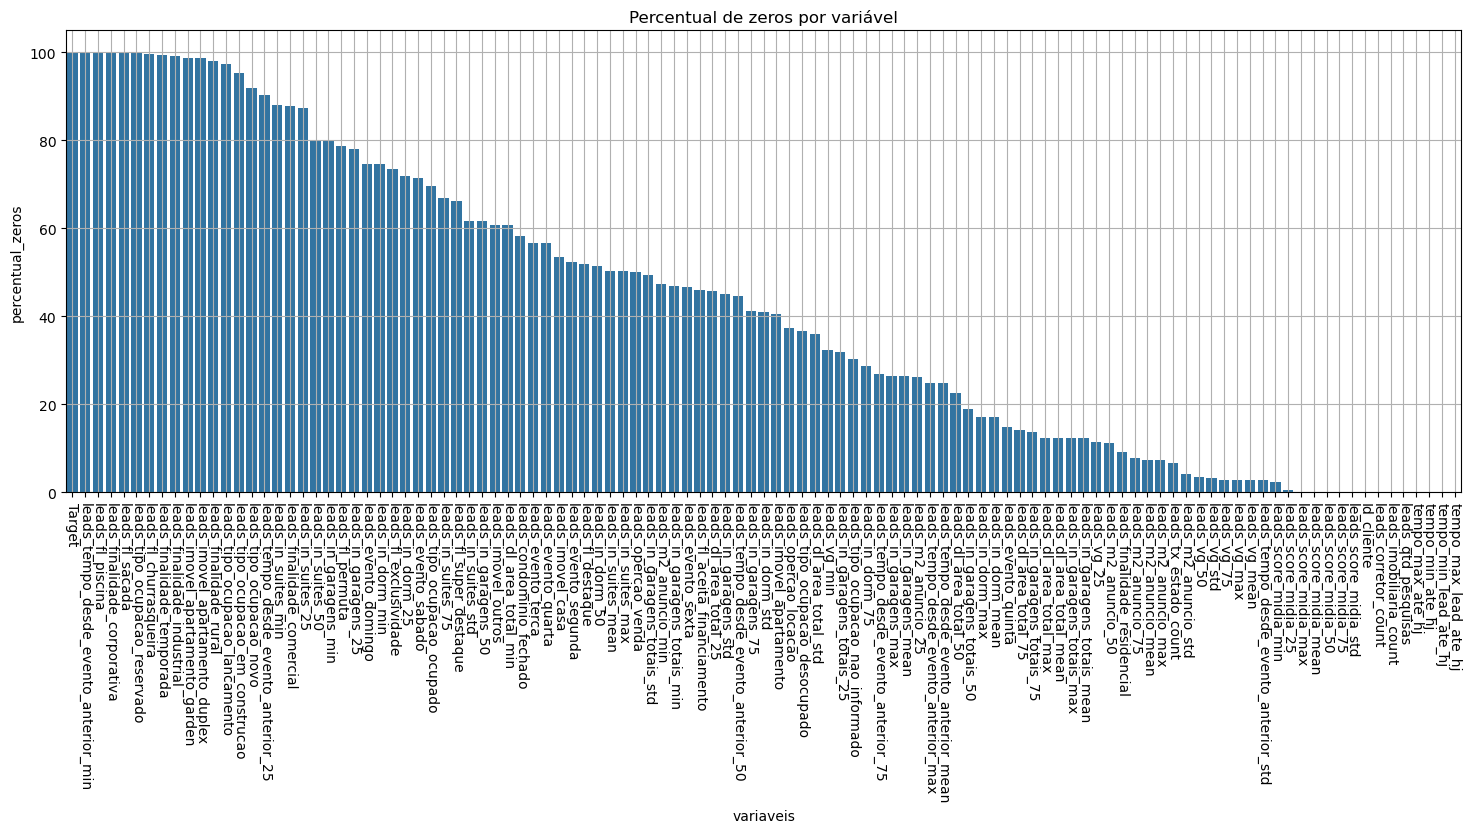

In [29]:
plt.figure(figsize=(18,6))
sns.barplot(data=sumario_zeros, x ='variaveis' , y ='percentual_zeros')
plt.title('Percentual de zeros por variável')
plt.grid(True)
plt.xticks(rotation=270)
plt.show()

<div style="text-align:justify">
<b>Comentário:</b><br>
Como podemos observar no gráfico acima o percentual de variáveis contendo zeros é muito grande. É necessario a remoção de algumas dessas variáveis.
</div>

In [30]:
dados_zeros_removidos = FuncoesUteis.remocao_variaveis_zeros(dados_nulos_removidos, valor_corte=0.4)

dados_zeros_removidos

,Id_cliente,leads_tempo_desde_evento_anterior_mean,leads_tempo_desde_evento_anterior_std,leads_tempo_desde_evento_anterior_75,leads_tempo_desde_evento_anterior_max,leads_score_midia_mean,leads_score_midia_std,leads_score_midia_min,leads_score_midia_25,leads_score_midia_50,...,leads_tipo_ocupacao_desocupado,leads_tipo_ocupacao_nao_informado,leads_tx_estado_count,leads_corretor_count,leads_imobiliaria_count,leads_qtd_pesquisas,tempo_max_ate_hj,tempo_min_ate_hj,tempo_min_lead_ate_hj,tempo_max_lead_ate_hj
0,1,72.04,157.91,79.0,615.0,13893.17,10104.56,4612.0,6446.0,13209.0,...,9.0,6.0,1.0,1.0,9.0,24.0,1754,17,1754.0,17.0
1,2,147.45,462.86,17.0,1542.0,11569.33,17968.08,841.0,841.0,1554.0,...,4.0,1.0,1.0,1.0,8.0,11.0,1643,17,1643.0,17.0
2,3,8.60,9.71,13.0,23.0,20898.67,10081.94,13209.0,13209.0,17174.0,...,1.0,3.0,1.0,1.0,4.0,5.0,63,17,63.0,17.0
3,4,172.20,295.97,273.0,912.0,8651.17,5820.76,1554.0,4612.0,9605.0,...,3.0,2.0,1.0,1.0,5.0,10.0,1742,17,1742.0,17.0
4,5,0.67,1.15,2.0,2.0,32313.00,NaN,32313.0,32313.0,32313.0,...,1.0,2.0,1.0,1.0,1.0,3.0,19,17,19.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,24.73,51.22,14.0,161.0,13794.75,14111.86,1554.0,4138.0,17174.0,...,0.0,8.0,1.0,1.0,4.0,11.0,294,18,294.0,18.0
4996,4997,137.62,235.68,143.0,606.0,10498.88,10580.47,517.0,4612.0,9845.0,...,2.0,4.0,2.0,1.0,6.0,13.0,1810,18,1810.0,18.0
4997,4998,134.33,178.59,337.0,337.0,9524.33,7814.94,1554.0,1554.0,9845.0,...,0.0,0.0,1.0,1.0,3.0,3.0,422,18,422.0,18.0
4998,4999,2.19,4.42,3.0,17.0,11665.00,6421.75,4612.0,4612.0,13209.0,...,5.0,8.0,1.0,1.0,10.0,16.0,56,18,56.0,18.0


In [31]:
sumario_zeros = FuncoesUteis.contagem_zeros(dados_zeros_removidos)

sumario_zeros = sumario_zeros.reset_index().rename(columns={'index':'variaveis'})

sumario_zeros

,variaveis,total_elementos,total_zeros,percentual_zeros
0,leads_opercao_locacao,5000,1871,37.42
1,leads_tipo_ocupacao_desocupado,5000,1838,36.76
2,leads_dl_area_total_std,5000,1798,35.96
3,leads_vg_min,5000,1614,32.28
4,leads_in_garagens_totais_25,5000,1594,31.88
5,leads_tipo_ocupacao_nao_informado,5000,1517,30.34
6,leads_in_dorm_75,5000,1437,28.74
7,leads_tempo_desde_evento_anterior_75,5000,1347,26.94
8,leads_in_garagens_max,5000,1320,26.40
9,leads_in_garagens_mean,5000,1320,26.40


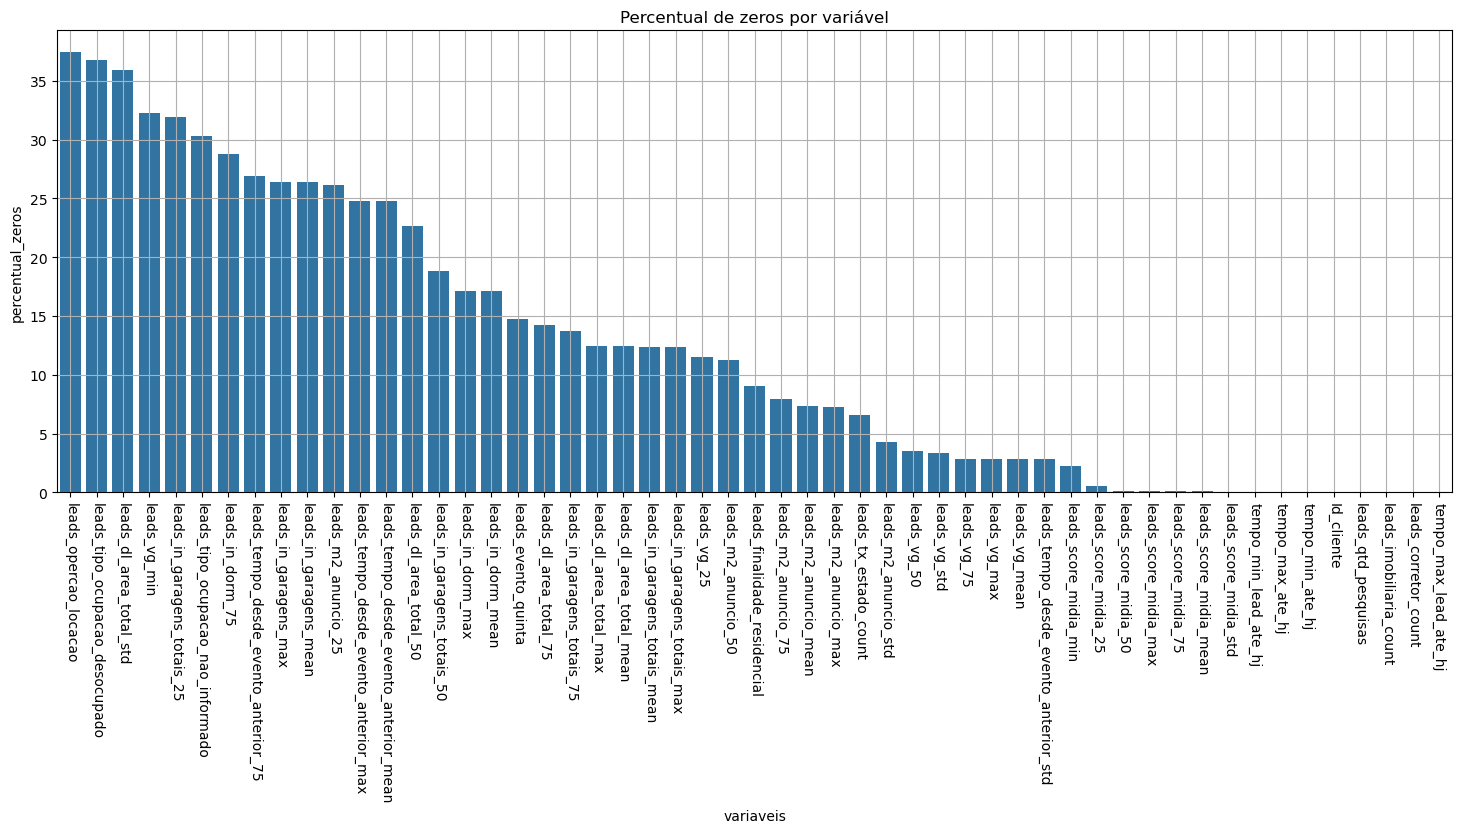

In [32]:
plt.figure(figsize=(18,6))
sns.barplot(data=sumario_zeros, x ='variaveis' , y ='percentual_zeros')
plt.title('Percentual de zeros por variável')
plt.grid(True)
plt.xticks(rotation=270)
plt.show()

<div style="text-align:justify">
<b>Comentário:</b><br>
Como podemos observar no gráfico acima o percentual de variáveis contendo zeros com valores até 40% ainda é grande, sendo assim necessário fazer algumas inputações para preencher esses valores.
</div>

<h3>Inputação de valores médios, moda ou mediana para os valores com nulos ou zeros</h3>

In [33]:
data = FuncoesUteis.inputar_metodo_zeros_nulos(data=dados_zeros_removidos, metodo='mean')

data

,Id_cliente,leads_tempo_desde_evento_anterior_mean,leads_tempo_desde_evento_anterior_std,leads_tempo_desde_evento_anterior_75,leads_tempo_desde_evento_anterior_max,leads_score_midia_mean,leads_score_midia_std,leads_score_midia_min,leads_score_midia_25,leads_score_midia_50,...,leads_tipo_ocupacao_desocupado,leads_tipo_ocupacao_nao_informado,leads_tx_estado_count,leads_corretor_count,leads_imobiliaria_count,leads_qtd_pesquisas,tempo_max_ate_hj,tempo_min_ate_hj,tempo_min_lead_ate_hj,tempo_max_lead_ate_hj
0,1,72.04,157.91,79.0,615.0,13893.17,10104.560000,4612.0,6446.0,13209.0,...,9.0,6.0,1.0,1.0,9.0,24.0,1754,17,1754.0,17.0
1,2,147.45,462.86,17.0,1542.0,11569.33,17968.080000,841.0,841.0,1554.0,...,4.0,1.0,1.0,1.0,8.0,11.0,1643,17,1643.0,17.0
2,3,8.60,9.71,13.0,23.0,20898.67,10081.940000,13209.0,13209.0,17174.0,...,1.0,3.0,1.0,1.0,4.0,5.0,63,17,63.0,17.0
3,4,172.20,295.97,273.0,912.0,8651.17,5820.760000,1554.0,4612.0,9605.0,...,3.0,2.0,1.0,1.0,5.0,10.0,1742,17,1742.0,17.0
4,5,0.67,1.15,2.0,2.0,32313.00,9489.073329,32313.0,32313.0,32313.0,...,1.0,2.0,1.0,1.0,1.0,3.0,19,17,19.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,24.73,51.22,14.0,161.0,13794.75,14111.860000,1554.0,4138.0,17174.0,...,0.0,8.0,1.0,1.0,4.0,11.0,294,18,294.0,18.0
4996,4997,137.62,235.68,143.0,606.0,10498.88,10580.470000,517.0,4612.0,9845.0,...,2.0,4.0,2.0,1.0,6.0,13.0,1810,18,1810.0,18.0
4997,4998,134.33,178.59,337.0,337.0,9524.33,7814.940000,1554.0,1554.0,9845.0,...,0.0,0.0,1.0,1.0,3.0,3.0,422,18,422.0,18.0
4998,4999,2.19,4.42,3.0,17.0,11665.00,6421.750000,4612.0,4612.0,13209.0,...,5.0,8.0,1.0,1.0,10.0,16.0,56,18,56.0,18.0


In [34]:
sumario_nulos_ = FuncoesUteis.varredura_nulos(data)

sumario_nulos_

,total_elementos,unicos,contagem_nulos,percentual_nulos,contagem_nas,percentual_nas
Id_cliente,5000,5000,0,0.0,0,0.0
leads_in_dorm_max,5000,23,0,0.0,0,0.0
leads_dl_area_total_std,5000,2652,0,0.0,0,0.0
leads_dl_area_total_50,5000,899,0,0.0,0,0.0
leads_dl_area_total_75,5000,1038,0,0.0,0,0.0
leads_dl_area_total_max,5000,1201,0,0.0,0,0.0
leads_in_garagens_totais_mean,5000,352,0,0.0,0,0.0
leads_in_garagens_totais_25,5000,17,0,0.0,0,0.0
leads_in_garagens_totais_50,5000,21,0,0.0,0,0.0
leads_in_garagens_totais_75,5000,23,0,0.0,0,0.0


<h3>Inspeção antes e pós imputação</h3>

<Axes: ylabel='Density'>

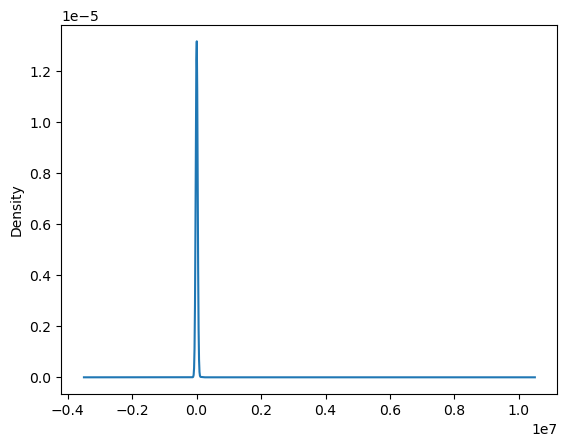

In [35]:
dados_zeros_removidos['leads_dl_area_total_50'].plot(kind='kde')

<Axes: ylabel='Density'>

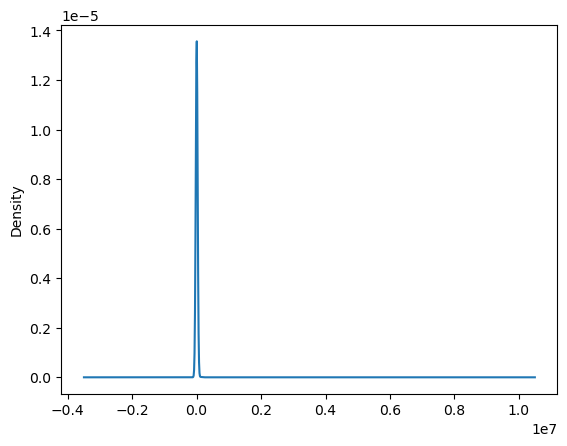

In [36]:
data['leads_dl_area_total_50'].plot(kind='kde')

<div style="text-align:justify">
<b>Comentário:</b><br>
Existem ainda variáveis que apresentam valores unicos = 1 
</div>

In [37]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id_cliente,5000.0,2.500500e+03,1.443520e+03,1.0,1250.750000,2500.500000,3.750250e+03,5.000000e+03
leads_tempo_desde_evento_anterior_mean,5000.0,1.223954e+02,2.772355e+02,0.0,0.237500,37.370000,1.434950e+02,1.100878e+04
leads_tempo_desde_evento_anterior_std,5000.0,2.875870e+02,7.307028e+02,0.0,63.635000,243.970000,2.875870e+02,3.236901e+04
leads_tempo_desde_evento_anterior_75,5000.0,2.132144e+02,4.799662e+02,0.0,0.000000,17.000000,1.680000e+02,7.069000e+03
leads_tempo_desde_evento_anterior_max,5000.0,6.649088e+02,3.773369e+03,0.0,1.000000,233.000000,8.072500e+02,9.732300e+04
leads_score_midia_mean,5000.0,1.167576e+04,7.605264e+03,0.0,6702.322500,11398.935000,1.593157e+04,3.744400e+04
leads_score_midia_std,5000.0,9.489073e+03,3.952184e+03,0.0,7585.840000,9489.073329,1.109113e+04,2.647196e+04
leads_score_midia_min,5000.0,6.166229e+03,8.260383e+03,0.0,568.000000,1554.000000,1.320900e+04,3.744400e+04
leads_score_midia_25,5000.0,7.175205e+03,8.008151e+03,0.0,1554.000000,4612.000000,1.320900e+04,3.744400e+04
leads_score_midia_50,5000.0,1.231415e+04,9.075101e+03,0.0,5753.000000,13209.000000,1.717400e+04,3.744400e+04


<h3>Remoção de variáveis que apresentam um único valor nas coluna</h3>

In [38]:
data_final = FuncoesUteis.remover_variaveis_um_unico_valor(data=data)

data_final.nunique()

Id_cliente                                5000
leads_tempo_desde_evento_anterior_mean    2859
leads_tempo_desde_evento_anterior_std     3316
leads_tempo_desde_evento_anterior_75       962
leads_tempo_desde_evento_anterior_max     1576
leads_score_midia_mean                    1947
leads_score_midia_std                     1915
leads_score_midia_min                       89
leads_score_midia_25                        81
leads_score_midia_50                        57
leads_score_midia_75                        50
leads_score_midia_max                       49
leads_vg_mean                             3048
leads_vg_std                              3007
leads_vg_min                               609
leads_vg_25                                751
leads_vg_50                                863
leads_vg_75                                922
leads_vg_max                               937
leads_m2_anuncio_mean                     3743
leads_m2_anuncio_std                      3043
leads_m2_anun

<h3>Conjunto de dados final para processamento</h3>

In [39]:
data_final

,Id_cliente,leads_tempo_desde_evento_anterior_mean,leads_tempo_desde_evento_anterior_std,leads_tempo_desde_evento_anterior_75,leads_tempo_desde_evento_anterior_max,leads_score_midia_mean,leads_score_midia_std,leads_score_midia_min,leads_score_midia_25,leads_score_midia_50,...,leads_finalidade_residencial,leads_tipo_ocupacao_desocupado,leads_tipo_ocupacao_nao_informado,leads_tx_estado_count,leads_imobiliaria_count,leads_qtd_pesquisas,tempo_max_ate_hj,tempo_min_ate_hj,tempo_min_lead_ate_hj,tempo_max_lead_ate_hj
0,1,72.04,157.91,79.0,615.0,13893.17,10104.560000,4612.0,6446.0,13209.0,...,20.0,9.0,6.0,1.0,9.0,24.0,1754,17,1754.0,17.0
1,2,147.45,462.86,17.0,1542.0,11569.33,17968.080000,841.0,841.0,1554.0,...,6.0,4.0,1.0,1.0,8.0,11.0,1643,17,1643.0,17.0
2,3,8.60,9.71,13.0,23.0,20898.67,10081.940000,13209.0,13209.0,17174.0,...,0.0,1.0,3.0,1.0,4.0,5.0,63,17,63.0,17.0
3,4,172.20,295.97,273.0,912.0,8651.17,5820.760000,1554.0,4612.0,9605.0,...,8.0,3.0,2.0,1.0,5.0,10.0,1742,17,1742.0,17.0
4,5,0.67,1.15,2.0,2.0,32313.00,9489.073329,32313.0,32313.0,32313.0,...,3.0,1.0,2.0,1.0,1.0,3.0,19,17,19.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,24.73,51.22,14.0,161.0,13794.75,14111.860000,1554.0,4138.0,17174.0,...,10.0,0.0,8.0,1.0,4.0,11.0,294,18,294.0,18.0
4996,4997,137.62,235.68,143.0,606.0,10498.88,10580.470000,517.0,4612.0,9845.0,...,8.0,2.0,4.0,2.0,6.0,13.0,1810,18,1810.0,18.0
4997,4998,134.33,178.59,337.0,337.0,9524.33,7814.940000,1554.0,1554.0,9845.0,...,2.0,0.0,0.0,1.0,3.0,3.0,422,18,422.0,18.0
4998,4999,2.19,4.42,3.0,17.0,11665.00,6421.750000,4612.0,4612.0,13209.0,...,16.0,5.0,8.0,1.0,10.0,16.0,56,18,56.0,18.0


<h3>Salvar base de dados para processamento</h3>

In [41]:
data_final.to_csv('storage/trusted/data_final.csv', index=False)